## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №15

Решить задачу регрессии.  
Получить максимальную метрику качества (R2, RMSE).


### Введение

Целью данной задачи является прогнозирование суммы пятничных распродаж в магазинах сети Walmart с помощью построения регрессионных моделей и их анализа.  
Набор данных состоит из исторических данных, которые охватывают продажи с 2010-02-05 по 2012-11-01, предствленных в файле Walmart.csv



**Обзор доступных данных**

В наборе данных содержится 6435 наблюдений, 8 признаков для каждого. Пустые значения отсутвуют.

- Store - Номер магазина (the store number)
- Date - Дата пятницы, окончание недели распродаж (the week of sales)
- Weekly_Sales - Сумма продаж для данного магазина (sales for the given store)
- Holiday_Flag - Признак праздничной недели (whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week)
- Temperature - Температура в день распродаж (Temperature on the day of sale)
- Fuel_Price - Стоимость топлива в регионе (Cost of fuel in the region)
- CPI – Преобладающий индекс потредительских цен (Prevailing consumer price index)
- Unemployment - Преобладающий уровень безработицы (Prevailing unemployment rate)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from datetime import datetime 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


DATA_CSV_PATH = 'Walmart.csv'

### Загрузка, анализ и преобразование данных

Загрузить данные: для признаков явно указываем требуемые типы

In [2]:
dtypes={
    'Store': 'uint8',
    'Date': 'object',
    'Weekly_Sales': float,
    'Holiday_Flag': 'uint8',
    'Temperature': float,
    'Fuel_Price': float,
    'CPI': float,
    'Unemployment': float
    }

df_raw = pd.read_csv(DATA_CSV_PATH , dtype = dtypes, sep=',')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   uint8  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   uint8  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), object(1), uint8(2)
memory usage: 314.3+ KB


Преобразовать дату в отдельные значения номера года, квартала, месяца и недели

In [3]:
date = pd.to_datetime(df_raw['Date'], dayfirst=True)

df_raw.insert(2, 'Date_year', (date.dt.year - 2000).astype('uint8'))
df_raw.insert(3, 'Date_quart', date.dt.quarter.astype('uint8'))
df_raw.insert(4, 'Date_month', date.dt.month.astype('uint8'))
df_raw.insert(5, 'Date_week', date.dt.isocalendar().week.astype('uint8'))

df_raw.drop(['Date'], inplace=True, axis=1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   uint8  
 1   Date_year     6435 non-null   uint8  
 2   Date_quart    6435 non-null   uint8  
 3   Date_month    6435 non-null   uint8  
 4   Date_week     6435 non-null   uint8  
 5   Weekly_Sales  6435 non-null   float64
 6   Holiday_Flag  6435 non-null   uint8  
 7   Temperature   6435 non-null   float64
 8   Fuel_Price    6435 non-null   float64
 9   CPI           6435 non-null   float64
 10  Unemployment  6435 non-null   float64
dtypes: float64(5), uint8(6)
memory usage: 289.2 KB


### Вариант 1: 
Категориальные признаки 'Store', 'Date_year', 'Date_quart', 'Date_month', 'Date_week', 'Holiday_Flag' оставить без изменений (кодируются отдельными значениями в одном столбце для соответсвующих категорий)

Выполнить разбиение исходной выборки данных на 2 подмножества (обучение и тестирование)

In [4]:
y = df_raw['Weekly_Sales']
X = df_raw.drop(['Weekly_Sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Выполнить обучение и проверку модели Linear Regression (вариант 1)

MAE: 433270.43,	 RMSE: 521853.28,	 R2:    0.15	 for Linear Regression model


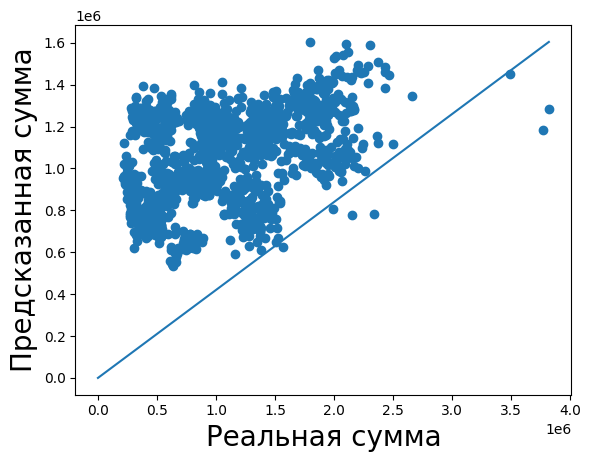

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2s = r2_score(y_test, lr_predictions)

print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Linear Regression model"
    .format(lr_mae, lr_mse**0.5, lr_r2s))

plt.scatter(y_test, lr_predictions) # точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(lr_predictions)])  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=20)
plt.ylabel('Предсказанная сумма', fontsize=20);

### Выполнить обучение и проверку модели Polynomial Regression

MAE: 383105.54,	 RMSE: 464128.54,	 R2:    0.33	 for Polynomial Regression model


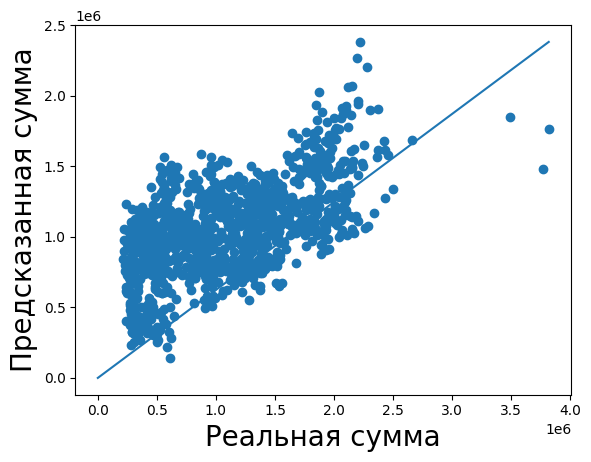

In [6]:
pr = make_pipeline(PolynomialFeatures(), LinearRegression())
pr.fit(X_train, y_train)
pr_predictions = pr.predict(X_test)

pr_mae = mean_absolute_error(y_test, pr_predictions)
pr_mse = mean_squared_error(y_test, pr_predictions)
pr_r2s = r2_score(y_test, pr_predictions)

print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Polynomial Regression model"
        .format(pr_mae, pr_mse**0.5, pr_r2s))

plt.scatter(y_test, pr_predictions)
plt.plot([0, max(y_test)], [0, max(pr_predictions)])
plt.xlabel('Реальная сумма', fontsize=20)
plt.ylabel('Предсказанная сумма', fontsize=20);

### Выполнить обучение и проверку модели Random Forest Regression

MAE: 61929.11,	 RMSE: 113604.80,	 R2:    0.96	 for Random Forest Regression model


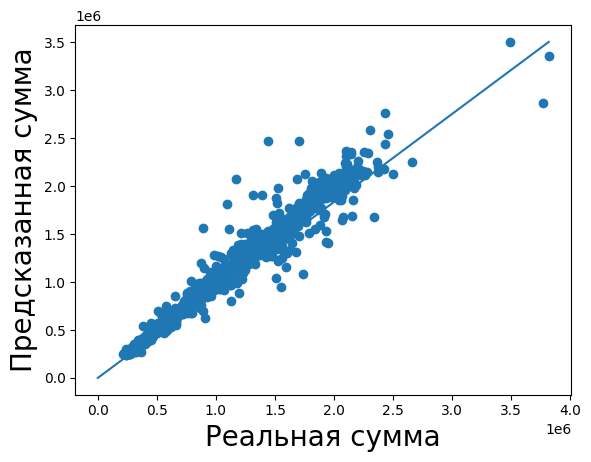

In [7]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2s = r2_score(y_test, rf_predictions)

print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Random Forest Regression model"
    .format(rf_mae, rf_mse**0.5, rf_r2s))

plt.scatter(y_test, rf_predictions)
plt.plot([0, max(y_test)], [0, max(rf_predictions)])
plt.xlabel('Реальная сумма', fontsize=20)
plt.ylabel('Предсказанная сумма', fontsize=20);

Сравним метрики получившихся моделей:

In [8]:
print("1. MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Random Forest Regression model"
    .format(rf_mae, rf_mse**0.5, rf_r2s))
print("2. MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Polynomial Regression model "
    .format(pr_mae, pr_mse**0.5, pr_r2s))
print("3. MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Linear Regression model"
    .format(lr_mae, lr_mse**0.5, lr_r2s))

1. MAE: 61929.11,	 RMSE: 113604.80,	 R2:    0.96	 for Random Forest Regression model
2. MAE: 383105.54,	 RMSE: 464128.54,	 R2:    0.33	 for Polynomial Regression model 
3. MAE: 433270.43,	 RMSE: 521853.28,	 R2:    0.15	 for Linear Regression model


### Вариант 2: 
Категориальные признаки 'Store', 'Date_year', 'Date_quart', 'Date_month', 'Date_week' кодируем как 'one-hot numeric array',  
признак 'Holiday_Flag' -бинарный, оставляем без изменений

In [9]:
num_columns = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']
cat_columns = ['Store', 'Date_year', 'Date_quart', 'Date_month', 'Date_week']

df_raw[['Store', 'Date_year', 'Date_quart', 'Date_month', 'Date_week']] = df_raw[['Store', 'Date_year', 'Date_quart', 'Date_month', 'Date_week']].astype('category')

df_num = df_raw[num_columns]
df_dummed = pd.get_dummies(df_raw[cat_columns])

df_cat = pd.concat((df_dummed, df_num), axis=1)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Columns: 122 entries, Store_1 to Weekly_Sales
dtypes: float64(5), uint8(117)
memory usage: 986.7 KB


In [10]:
y = df_cat['Weekly_Sales']
X = df_cat.drop(['Weekly_Sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Выполнить обучение и проверку модели Linear Regression (вариант 2)

MAE: 72152.54,	 RMSE: 113942.64,	 R2:    0.96	 for Linear Regression model (OneHotEncoded)
MAE: 433270.43,	 RMSE: 521853.28,	 R2:    0.15	 for Linear Regression model (LabelEncoded)


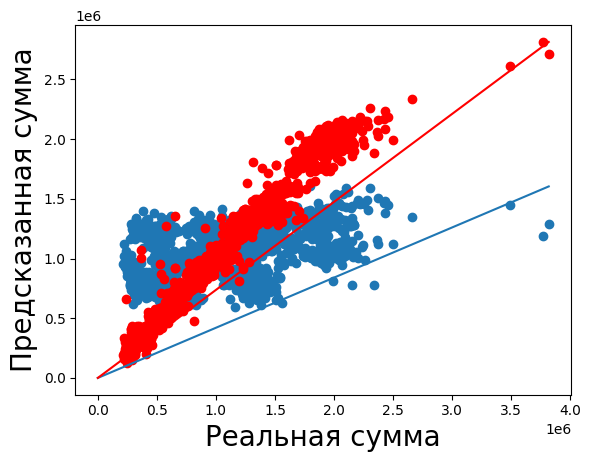

In [11]:
lr.fit(X_train, y_train)
lrc_predictions = lr.predict(X_test)

lrc_mae = mean_absolute_error(y_test, lrc_predictions)
lrc_mse = mean_squared_error(y_test, lrc_predictions)
lrc_r2s = r2_score(y_test, lrc_predictions)

print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Linear Regression model (OneHotEncoded)"
    .format(lrc_mae, lrc_mse**0.5, lrc_r2s))
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Linear Regression model (LabelEncoded)"
    .format(lr_mae, lr_mse**0.5, lr_r2s))

plt.scatter(y_test, lr_predictions) # точки, соответствущие парам настоящее значение - прогноз
plt.scatter(y_test, lrc_predictions, color='r') # точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(lr_predictions)])  # прямая, на которой предсказаные и реальные значения совпадают
plt.plot([0, max(y_test)], [0, max(lrc_predictions)], color='r')  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=20)
plt.ylabel('Предсказанная сумма', fontsize=20);

### Выполнить обучение и проверку модели Polynomial Regression (вариант 2)

MAE: 383105.54,	 RMSE: 464128.54,	 R2:    0.33	 for Polynomial Regression model (LabelEncoded)
MAE: 67509.12,	 RMSE: 162471.52,	 R2:    0.92	 for Polynomial Regression model (OneHotEncoded)


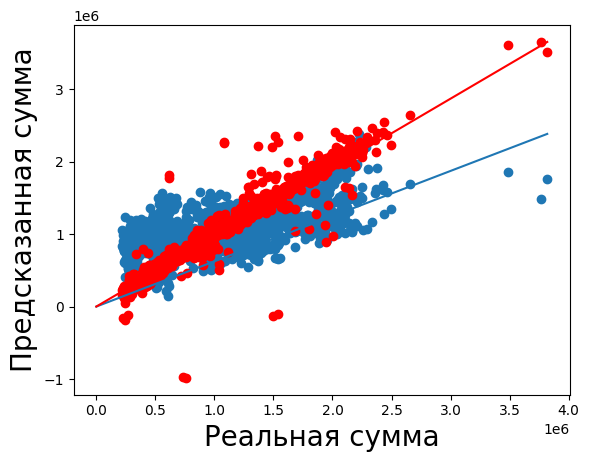

In [12]:
pr.fit(X_train, y_train)
prc_predictions = pr.predict(X_test)

prс_mae = mean_absolute_error(y_test, prc_predictions)
prс_mse = mean_squared_error(y_test, prc_predictions)
prс_r2s = r2_score(y_test, prc_predictions)

print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Polynomial Regression model (LabelEncoded)"
        .format(pr_mae, pr_mse**0.5, pr_r2s))
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Polynomial Regression model (OneHotEncoded)"
        .format(prс_mae, prс_mse**0.5, prс_r2s))

plt.scatter(y_test, pr_predictions)
plt.scatter(y_test, prc_predictions, color='r')
plt.plot([0, max(y_test)], [0, max(pr_predictions)])
plt.plot([0, max(y_test)], [0, max(prc_predictions)], color='r')
plt.xlabel('Реальная сумма', fontsize=20)
plt.ylabel('Предсказанная сумма', fontsize=20);

### Выполнить обучение и проверку модели Random Forest Regression (вариант 2)

MAE: 61929.11,	 RMSE: 113604.80,	 R2:    0.96	 for Random Forest Regression model (LabelEncoded)
MAE: 56301.41,	 RMSE: 99634.57,	 R2:    0.97	 for Random Forest Regression model (OneHotEncoded)


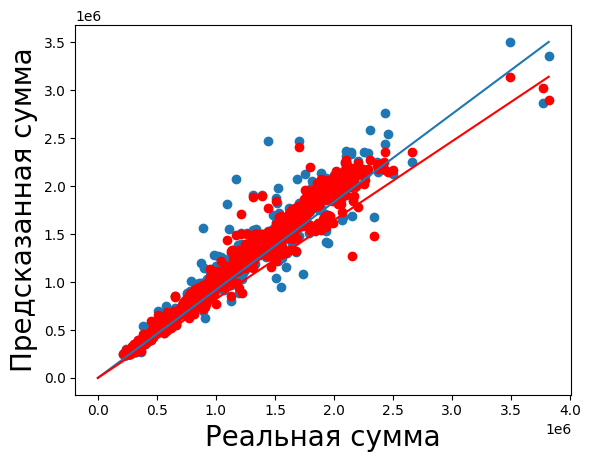

In [13]:
rf.fit(X_train, y_train)
rfc_predictions = rf.predict(X_test)

rfc_mae = mean_absolute_error(y_test, rfc_predictions)
rfc_mse = mean_squared_error(y_test, rfc_predictions)
rfc_r2s = r2_score(y_test, rfc_predictions)

print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Random Forest Regression model (LabelEncoded)"
    .format(rf_mae, rf_mse**0.5, rf_r2s))
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t for Random Forest Regression model (OneHotEncoded)"
    .format(rfc_mae, rfc_mse**0.5, rfc_r2s))

plt.scatter(y_test, rf_predictions)
plt.scatter(y_test, rfc_predictions, color='r')
plt.plot([0, max(y_test)], [0, max(rf_predictions)])
plt.plot([0, max(y_test)], [0, max(rfc_predictions)], color='r')
plt.xlabel('Реальная сумма', fontsize=20)
plt.ylabel('Предсказанная сумма', fontsize=20);

### Выводы

Отбразим метрики всех построенных моделей:

In [14]:
print("\nМетрики для Random Forest Regression model:")
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t (OneHotEncoded)"
    .format(rfc_mae, rfc_mse**0.5, rfc_r2s))
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t (LabelEncoded)"
    .format(rf_mae, rf_mse**0.5, rf_r2s))

print("\nМетрики для Polynomial Regression model:")
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t (OneHotEncoded)"
        .format(prс_mae, prс_mse**0.5, prс_r2s))
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t (LabelEncoded)"
        .format(pr_mae, pr_mse**0.5, pr_r2s))

print("\nМетрики для Linear Regression model:")
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t (OneHotEncoded)"
    .format(lrc_mae, lrc_mse**0.5, lrc_r2s))
print("MAE: {0:7.2f},\t RMSE: {1:7.2f},\t R2: {2:7.2f}\t (LabelEncoded)"
    .format(lr_mae, lr_mse**0.5, lr_r2s))


Метрики для Random Forest Regression model:
MAE: 56301.41,	 RMSE: 99634.57,	 R2:    0.97	 (OneHotEncoded)
MAE: 61929.11,	 RMSE: 113604.80,	 R2:    0.96	 (LabelEncoded)

Метрики для Polynomial Regression model:
MAE: 67509.12,	 RMSE: 162471.52,	 R2:    0.92	 (OneHotEncoded)
MAE: 383105.54,	 RMSE: 464128.54,	 R2:    0.33	 (LabelEncoded)

Метрики для Linear Regression model:
MAE: 72152.54,	 RMSE: 113942.64,	 R2:    0.96	 (OneHotEncoded)
MAE: 433270.43,	 RMSE: 521853.28,	 R2:    0.15	 (LabelEncoded)


1. Преобразование категориальных признаков в разряженную матрицу (One Hot Array) существенно улучшает метрики моделей Linear и Polinomial Regression.  
Причем алгоритм Linear Regression при наилучшей скорости обучения показывает на разряженных признаках лучшую точность, сравнимую с точностью алгоритма Random Forest Regression! 

2. Алгоритм Random Forest Regression показывет лучшую точность из всех использованных алгоритмов, хотя применение "разряженных" признаков не дает сущесвенного улучшения метрик.